### Importar la data

In [1]:
import yfinance as yf
import pandas as pd

# Definir las empresas del Dow Jones
tickers = ["AAPL", "MSFT", "JPM", "V", "UNH", "GS", "HD", "PG", "DIS", "NKE",
           "KO", "MRK", "AXP", "TRV", "IBM", "BA", "WMT", "MMM", "MCD", "INTC",
           "CAT", "CVX", "HON", "VZ", "JNJ", "AMGN", "DOW", "CRM", "WBA"]

# Definir los periodos de tiempo
periods = {"5y": "5 años", "10y": "10 años"}

# Descargar datos
data = {}
for period, period_name in periods.items():
    data[period] = {}
    for ticker in tickers:
        data[period][ticker] = yf.download(ticker, period=period)

# Convertir a DataFrame
df_5y = {ticker: data["5y"][ticker]["Close"] for ticker in tickers}
df_10y = {ticker: data["10y"][ticker]["Close"] for ticker in tickers}

df_5y = pd.DataFrame(df_5y)
df_10y = pd.DataFrame(df_10y)

# Guardar los datos en CSV para su posterior uso
df_5y.to_csv('dow_jones_5y.csv')
df_10y.to_csv('dow_jones_10y.csv')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

### Comprobar carga correcta de los datos

In [2]:
import pandas as pd

# Cargar los archivos CSV
df_5y = pd.read_csv('dow_jones_5y.csv', index_col=0, parse_dates=True)
df_10y = pd.read_csv('dow_jones_10y.csv', index_col=0, parse_dates=True)

# Mostrar las primeras filas de cada DataFrame para revisión
df_5y.head(), df_10y.head()


(                 AAPL        MSFT         JPM           V         UNH  \
 Date                                                                    
 2019-07-08  50.005001  136.960007  112.870003  176.190002  247.839996   
 2019-07-09  50.310001  136.460007  113.349998  177.729996  246.000000   
 2019-07-10  50.807499  137.850006  113.019997  179.309998  247.479996   
 2019-07-11  50.437500  138.399994  114.099998  180.740005  261.160004   
 2019-07-12  50.825001  138.899994  115.300003  180.330002  265.899994   
 
                     GS          HD          PG         DIS        NKE  ...  \
 Date                                                                   ...   
 2019-07-08  205.750000  212.910004  114.050003  141.020004  88.480003  ...   
 2019-07-09  207.770004  212.000000  112.910004  141.610001  88.040001  ...   
 2019-07-10  205.970001  210.750000  113.750000  143.539993  87.440002  ...   
 2019-07-11  211.350006  214.039993  114.379997  143.559998  88.290001  ...   
 2019-

## Análisis Exploratorio de Datos (EDA)

### Visualización de Series Temporales:

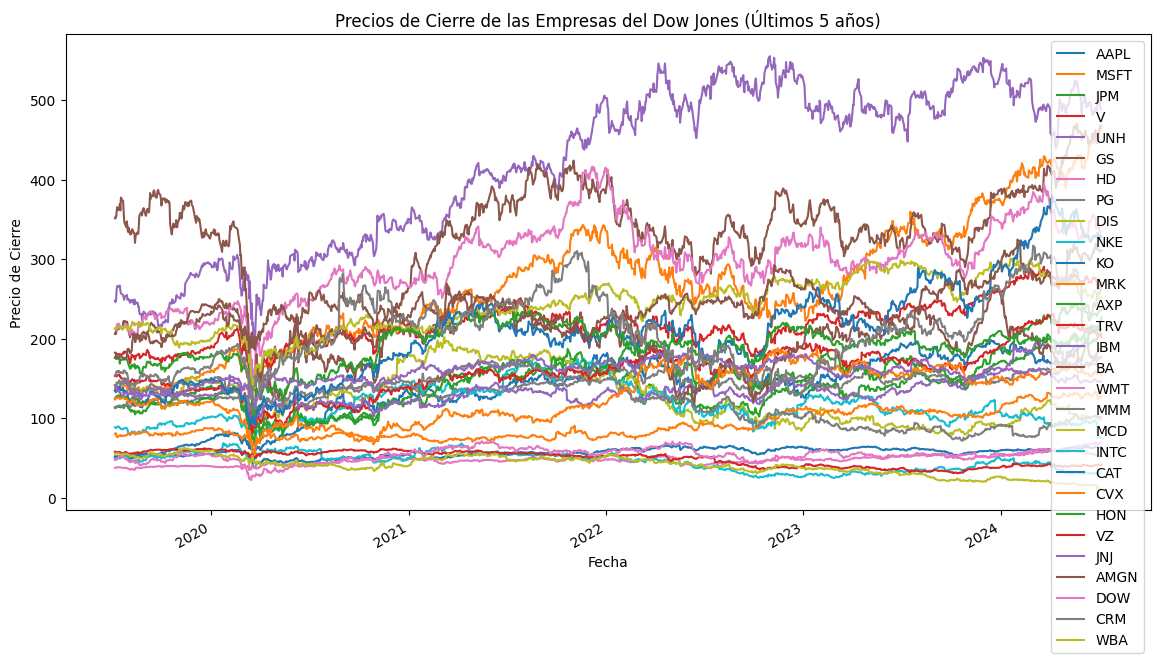

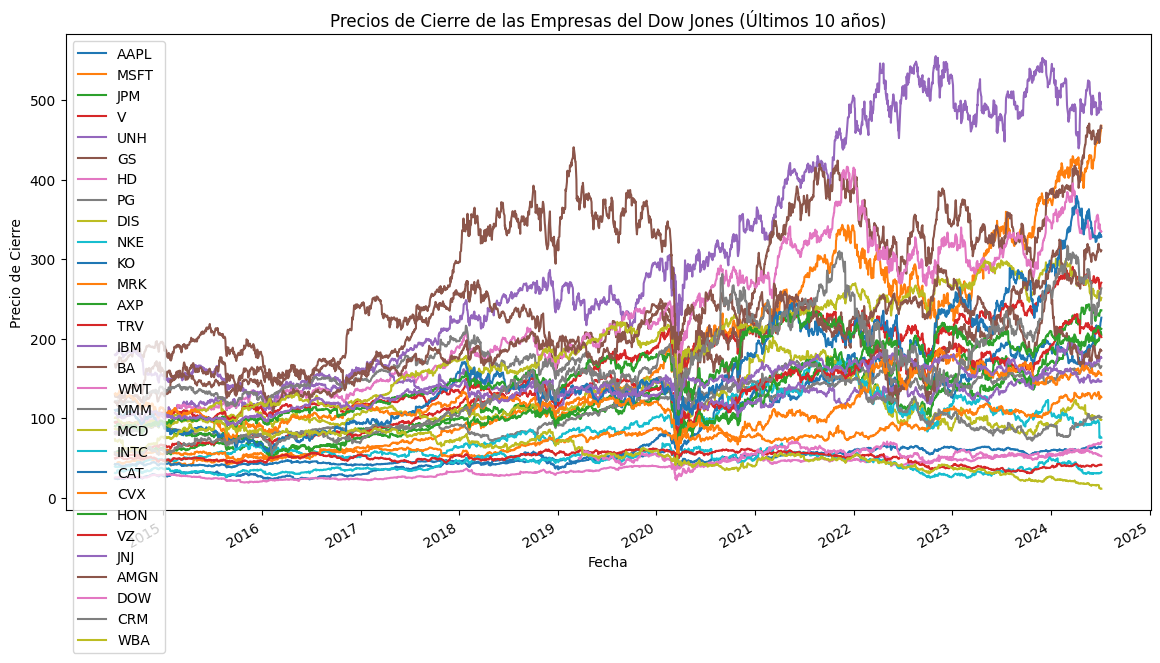

In [3]:
import matplotlib.pyplot as plt

# Visualización de series temporales de precios de cierre para los últimos 5 años
df_5y.plot(figsize=(14, 7))
plt.title('Precios de Cierre de las Empresas del Dow Jones (Últimos 5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='best')
plt.show()

# Visualización de series temporales de precios de cierre para los últimos 10 años
df_10y.plot(figsize=(14, 7))
plt.title('Precios de Cierre de las Empresas del Dow Jones (Últimos 10 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='best')
plt.show()


### Cálculo de Estadísticas Descriptivas:

In [8]:
# Estadísticas descriptivas para los últimos 5 años
stats_5y = df_5y.describe()
print("Estadísticas Descriptivas (Últimos 5 años):\n", stats_5y)

# Estadísticas descriptivas para los últimos 10 años
stats_10y = df_10y.describe()
print("\nEstadísticas Descriptivas (Últimos 10 años):\n", stats_10y)


Estadísticas Descriptivas (Últimos 5 años):
               AAPL         MSFT          JPM            V          UNH  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    137.232188   266.422281   137.902663   217.074285   418.071638   
std      42.059748    78.800018    26.997254    28.560164   100.268565   
min      48.334999   132.210007    79.029999   135.740005   194.860001   
25%     115.849998   212.694996   117.042500   197.759995   318.387497   
50%     145.919998   259.554993   137.639999   213.724998   460.219986   
75%     171.137501   319.955002   155.324997   232.555004   502.932503   
max     226.339996   467.559998   208.830002   290.369995   555.150024   

                GS           HD           PG          DIS          NKE  ...  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000  ...   
mean    311.331312   296.450365   140.584277   126.264292   115.919134  ...   
std      76.348473    48.367253    14.227721    31.

### Identificación de Tendencias:

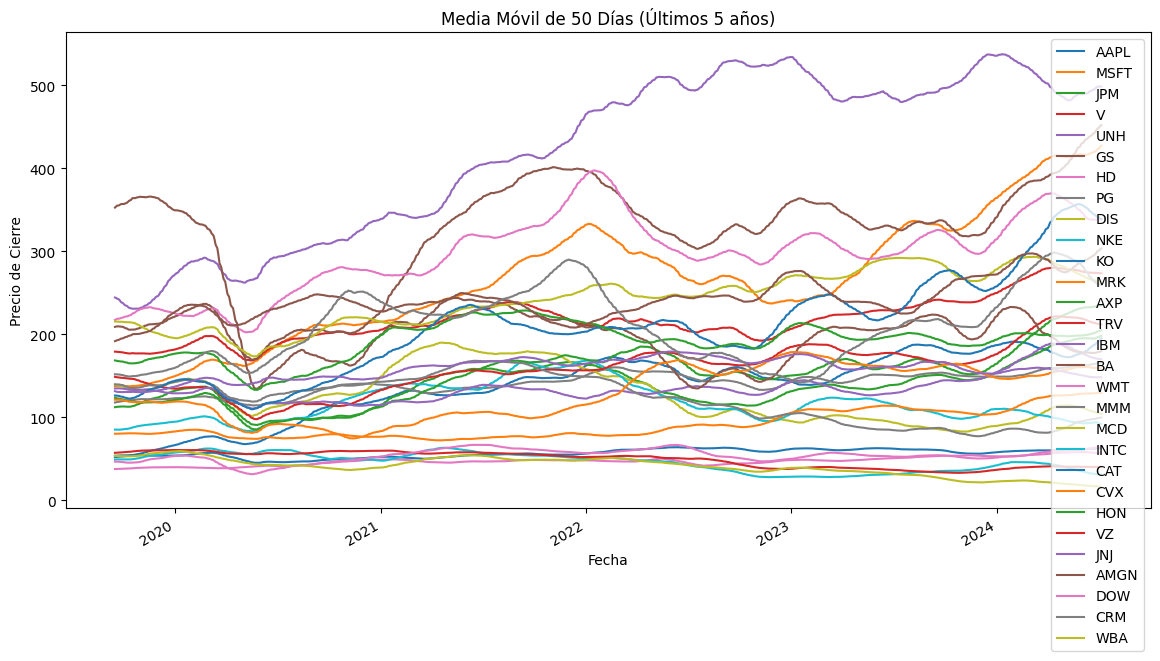

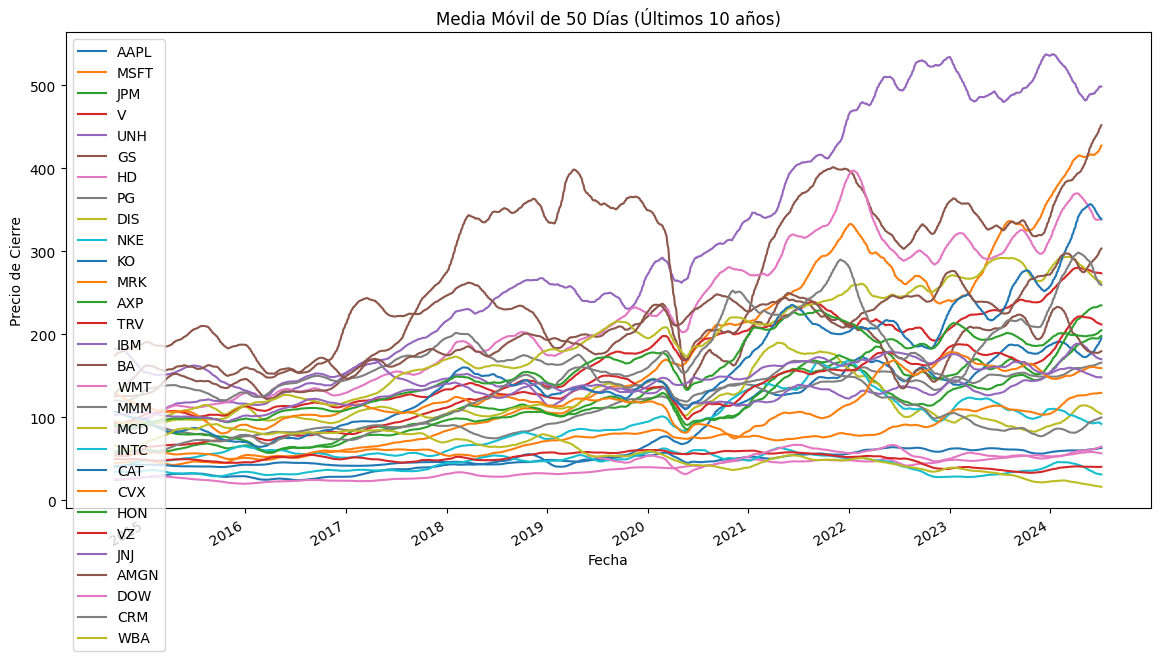

In [5]:
# Cálculo de medias móviles (por ejemplo, media móvil de 50 días)
df_5y_ma50 = df_5y.rolling(window=50).mean()
df_10y_ma50 = df_10y.rolling(window=50).mean()

# Visualización de medias móviles para los últimos 5 años
df_5y_ma50.plot(figsize=(14, 7))
plt.title('Media Móvil de 50 Días (Últimos 5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='best')
plt.show()

# Visualización de medias móviles para los últimos 10 años
df_10y_ma50.plot(figsize=(14, 7))
plt.title('Media Móvil de 50 Días (Últimos 10 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='best')
plt.show()


## Análisis de Correlación

### Cálculo de la Matriz de Correlación:

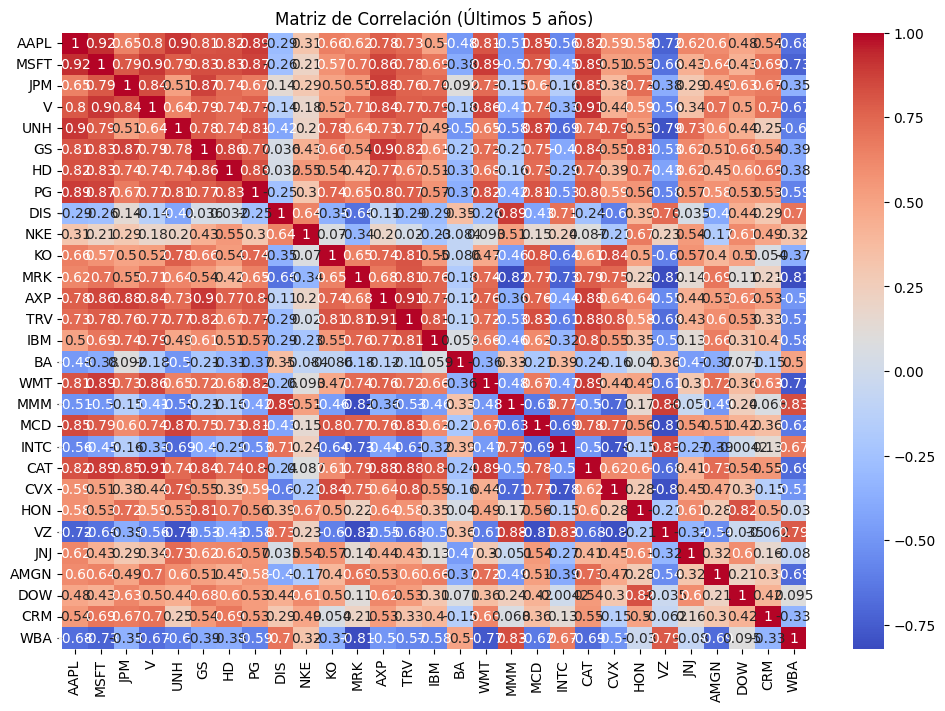

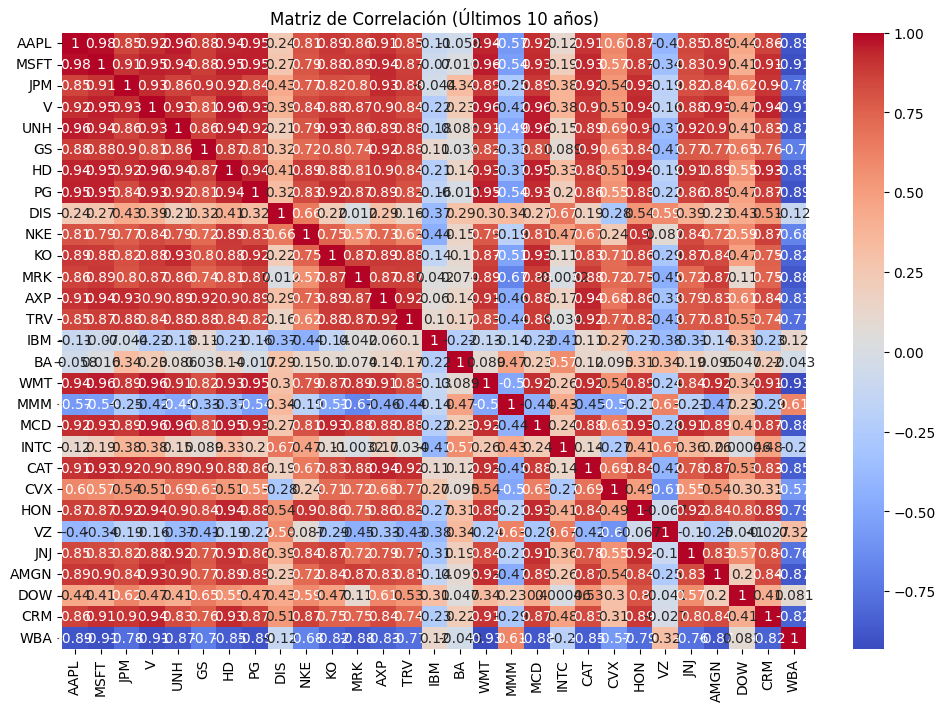

In [9]:
import seaborn as sns

# Matriz de correlación para los últimos 5 años
correlation_matrix_5y = df_5y.corr()

# Visualización de la matriz de correlación para los últimos 5 años
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_5y, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Últimos 5 años)')
plt.show()
# Usar la función que nos permite graficar únicamente la mitad de la tabla de correlación

# Matriz de correlación para los últimos 10 años
correlation_matrix_10y = df_10y.corr()

# Visualización de la matriz de correlación para los últimos 10 años
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_10y, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Últimos 10 años)')
plt.show()


### Visualización de Series Temporales para Índices (Últimos 5 y 10 años) Tenemos que cargar los datos de los índices para que funcione

In [10]:
# Definir los índices Este arroja error porque no he importado los datos
indices = ["^DJI", "^GSPC", "^IXIC", "^RUT"]

# Gráficos de tendencias históricas de índices para los últimos 5 años
plt.figure(figsize=(14, 7))
df_5y[indices].plot(ax=plt.gca())
plt.title('Tendencias Históricas de Índices (Últimos 5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='best')
plt.show()

# Gráficos de tendencias históricas de índices para los últimos 10 años
plt.figure(figsize=(14, 7))
df_10y[indices].plot(ax=plt.gca())
plt.title('Tendencias Históricas de Índices (Últimos 10 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='best')
plt.show()


KeyError: "None of [Index(['^DJI', '^GSPC', '^IXIC', '^RUT'], dtype='object')] are in the [columns]"

<Figure size 1400x700 with 0 Axes>